# EDA

- Baseline of 62% accuracy

In [12]:
%reload_ext autoreload
%autoreload 2

In [37]:
import pandas as pd
import numpy as np
import sys
import os
import toml
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from utils import model

In [16]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

constants = toml.load('../data/constants.toml')

In [67]:
def get_survival_rate(data):
    return data['Survived'].mean()

def get_death_rate(data):
    return 1 - get_survival_rate(data)

### Age

Age is missing for 177 / 893 training rows, 86 / 418 test rows. ~30% ageless passengers survived.

Age distribution somewhat multimodal, positive skew, peaking around 22, median around 35

Age alone isn't a good predictor

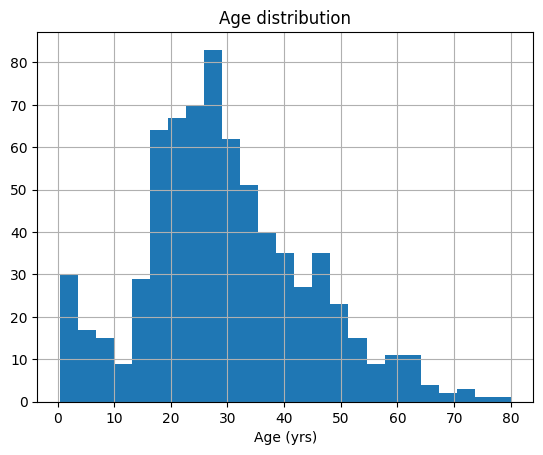

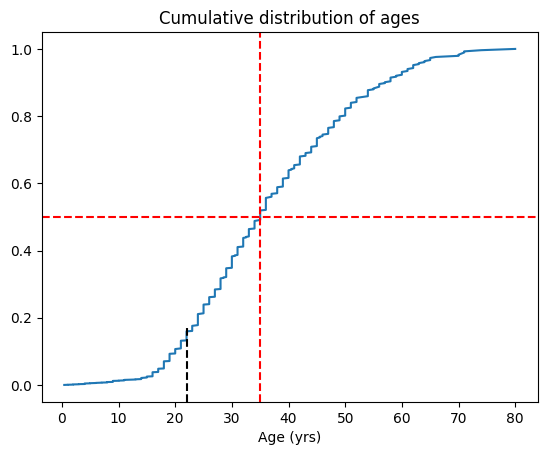

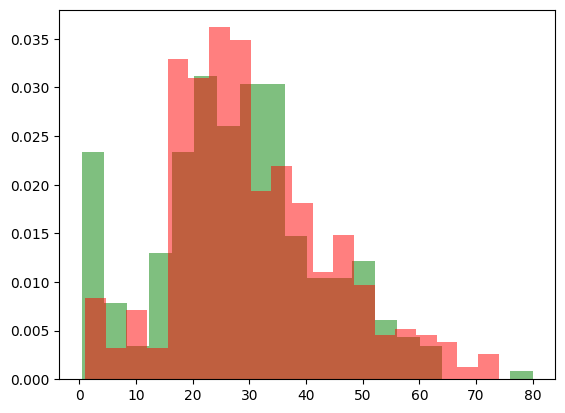

In [59]:
ages = train[~train.Age.isna()].Age
labels = train[~train.Age.isna()].Survived

ages.hist(bins=25)
plt.title('Age distribution')
plt.xlabel('Age (yrs)')
plt.show()

plt.plot(sorted(ages), (np.cumsum(sorted(ages)) / sum(ages)))
plt.title('Cumulative distribution of ages')
plt.xlabel('Age (yrs)')
plt.axhline(0.5, color='r', linestyle='--')
plt.axvline(35, color='r', linestyle='--')
plt.axvline(22, color='k', linestyle='--', ymax=0.2)
plt.show()

plt.hist(ages[labels == 1], bins=20, density=True, alpha=0.5, color='g', label='Survived')
plt.hist(ages[labels == 0], bins=20, density=True, alpha=0.5, color='r', label='Died');

### Sex

Female passengers were more likely to survive.

In [69]:
print(f'Survival rate: {get_survival_rate(train)}')

print(f'Female survival rate: {get_survival_rate(train[train['Sex'] == 'female'])}')
print(f'Male survival rate: {get_survival_rate(train[train.Sex == 'male'])}')

Survival rate: 0.3838383838383838
Female survival rate: 0.7420382165605095
Male survival rate: 0.18890814558058924


In [72]:
sex_model = model.SexBaselineModel()
sex_model.evaluate(train, train['Survived'])

np.float64(0.7867564534231201)